In [281]:
import csv

import numpy as np
import tensorflow as tf

%matplotlib inline
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = 42

In [282]:
import os
from datetime import datetime
current_time = datetime.now().strftime('%m%d_%H%M')
folder_name = current_time

In [283]:
folder = 'keypoint_upper/'
save_folder = f'keypoint_upper/training_{current_time}/'
os.makedirs(save_folder, exist_ok=True)
os.makedirs(save_folder+'fig/', exist_ok=True)
os.makedirs(save_folder+'pkl/', exist_ok=True)
dataset1 = f'{folder}/keypoint_9apr_upper_right_miew.csv'
dataset2 = f'{folder}/keypoint_9apr_upper_right_mun.csv'

# Load data

In [284]:
column_names = ['hand_sign_id',
    'lm0_x', 'lm0_y', 'lm1_x', 'lm1_y', 'lm2_x', 'lm2_y', 'lm3_x', 'lm3_y',
    'lm4_x', 'lm4_y', 'lm5_x', 'lm5_y', 'lm6_x', 'lm6_y', 'lm7_x', 'lm7_y',
    'lm8_x', 'lm8_y', 'lm9_x', 'lm9_y', 'lm10_x', 'lm10_y', 'lm11_x', 'lm11_y',
    'lm12_x', 'lm12_y', 'lm13_x', 'lm13_y', 'lm14_x', 'lm14_y', 'lm15_x', 'lm15_y',
    'lm16_x', 'lm16_y', 'lm17_x', 'lm17_y', 'lm18_x', 'lm18_y', 'lm19_x', 'lm19_y',
    'lm20_x', 'lm20_y'
]
df1 = pd.read_csv(dataset1, header=None, names=column_names)
df2 = pd.read_csv(dataset2, header=None, names=column_names)
df = pd.concat([df1, df2], axis=0)

In [285]:
df.head()

,hand_sign_id,lm0_x,lm0_y,lm1_x,lm1_y,lm2_x,lm2_y,lm3_x,lm3_y,lm4_x,...,lm16_x,lm16_y,lm17_x,lm17_y,lm18_x,lm18_y,lm19_x,lm19_y,lm20_x,lm20_y
0,0,0.0,0.0,-0.270115,0.212644,-0.419540,0.494253,-0.517241,0.712644,-0.580460,...,-0.178161,0.712644,0.224138,0.626437,0.109195,0.724138,0.011494,0.718391,-0.057471,0.672414
1,0,0.0,0.0,-0.264368,0.206897,-0.413793,0.488506,-0.511494,0.706897,-0.568966,...,-0.201149,0.706897,0.229885,0.620690,0.103448,0.712644,0.000000,0.706897,-0.074713,0.660920
2,0,0.0,0.0,-0.270115,0.218391,-0.413793,0.494253,-0.511494,0.712644,-0.568966,...,-0.189655,0.678161,0.224138,0.626437,0.103448,0.718391,0.000000,0.706897,-0.068966,0.655172
3,0,0.0,0.0,-0.264368,0.212644,-0.413793,0.494253,-0.500000,0.718391,-0.551724,...,-0.143678,0.701149,0.247126,0.643678,0.132184,0.747126,0.040230,0.735632,-0.022989,0.689655
4,1,0.0,0.0,-0.264045,0.224719,-0.404494,0.516854,-0.500000,0.730337,-0.561798,...,-0.157303,0.747191,0.219101,0.612360,0.207865,0.764045,0.151685,0.814607,0.106742,0.820225


In [286]:
# df = df.rename(columns={'gesture': 'hand_sign_id'})

In [287]:
# new_names = {}
# for i in range(21):  # For landmarks 0-20
#    new_names[f'lm_{i}_x'] = f'lm{i}_x'
#    new_names[f'lm_{i}_y'] = f'lm{i}_y'

# # Rename the columns
# df = df.rename(columns=new_names)

In [288]:
print('Shape of the dataset: ', df.shape)
print('No Command row: ',len(df[df.hand_sign_id == 0]))
print('Pinky row: ', len(df[df.hand_sign_id == 1]))

Shape of the dataset:  (980, 43)
No Command row:  372
Pinky row:  608


In [289]:
df = df.dropna()

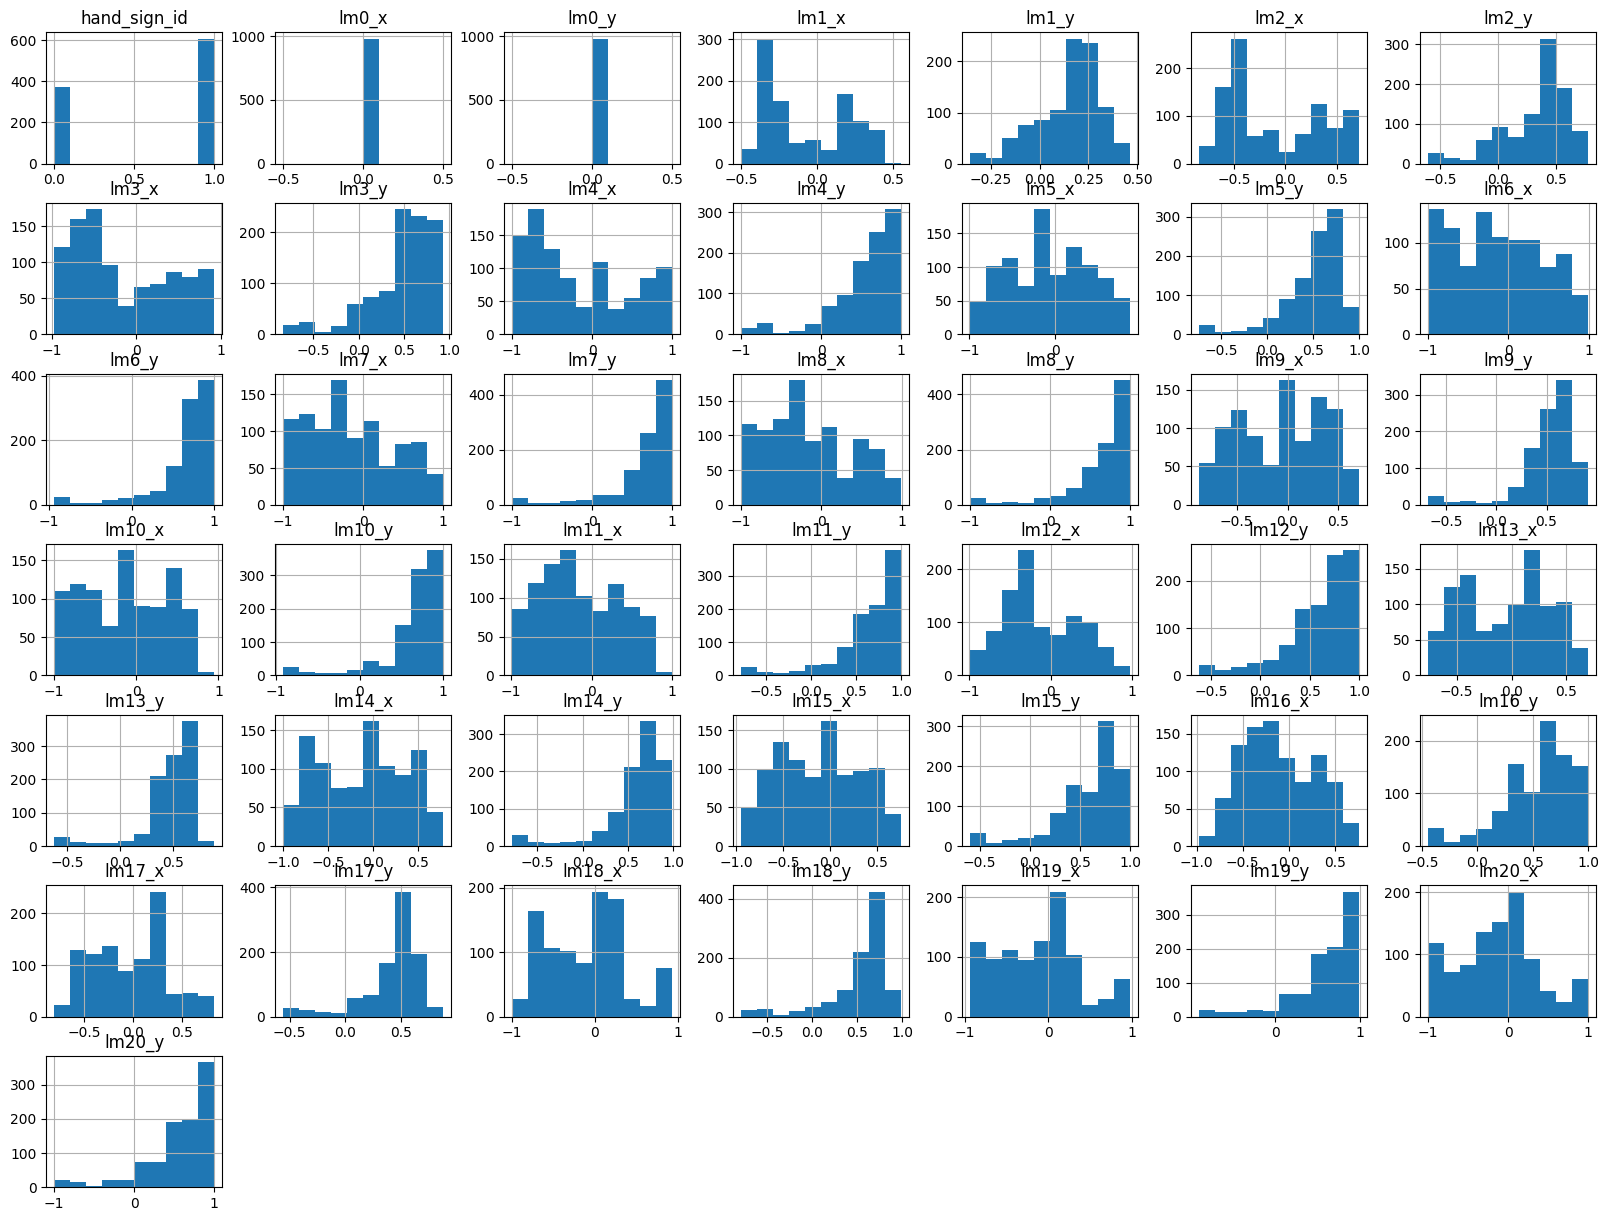

In [290]:
df.hist(figsize=(20, 15))
plt.savefig(f'{save_folder}fig/data_distribution.jpg', format='jpg', dpi=300)
plt.show()

In [291]:
target = np.array(df.hand_sign_id)
x = df.drop(columns=['hand_sign_id'])

# Pre process data

In [292]:
X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.3,shuffle=True,stratify=target)

In [293]:
X_train.shape

(686, 42)

In [294]:
X_test.shape

(294, 42)

### scale feature

In [295]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=pd.DataFrame(scaler.transform(X_train),columns=x.columns)
X_test=pd.DataFrame(scaler.transform(X_test),columns=x.columns)

### drop feature

In [296]:
# corr_csv_path = '/content/drive/MyDrive/Final Project/correlation_matrix.csv'
# X_train.corr().round(2).mask((X_train.corr() <= 0.7) & (X_train.corr() >= -0.7), '').to_csv(corr_csv_path)

In [297]:
selected_features = ['lm1_x', 'lm1_y','lm5_x', 'lm5_y','lm8_x', 'lm8_y','lm9_x', 'lm9_y','lm12_x', 'lm12_y','lm13_x', 'lm13_y','lm17_x', 'lm17_y','lm18_x', 'lm18_y','lm19_x', 'lm19_y','lm20_x', 'lm20_y' ]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [298]:
X_train_selected.corr().round(2).mask((X_train.corr()<=0.7)&(X_train.corr()>=-0.7),'')

,lm1_x,lm1_y,lm5_x,lm5_y,lm8_x,lm8_y,lm9_x,lm9_y,lm12_x,lm12_y,lm13_x,lm13_y,lm17_x,lm17_y,lm18_x,lm18_y,lm19_x,lm19_y,lm20_x,lm20_y
lm1_x,1.0,,0.73,,0.71,,,,,,,,,,,,,,,
lm1_y,,1.0,,,,,,,,,,,,,,,,,,
lm5_x,0.73,,1.0,,0.94,,0.95,,0.9,,0.8,,,,,,,,,
lm5_y,,,,1.0,,0.8,,0.95,,,,0.78,,,,,,,,
lm8_x,0.71,,0.94,,1.0,,0.9,,0.96,,0.78,,,,,,,,,
lm8_y,,,,0.8,,1.0,,0.82,,0.92,,0.78,,,,,,,,
lm9_x,,,0.95,,0.9,,1.0,,0.92,,0.95,,0.79,,0.78,,0.76,,0.72,
lm9_y,,,,0.95,,0.82,,1.0,,0.71,,0.94,,0.75,,0.71,,,,
lm12_x,,,0.9,,0.96,,0.92,,1.0,,0.85,,,,0.71,,0.71,,,
lm12_y,,,,,,0.92,,0.71,,1.0,,0.76,,0.73,,0.75,,0.72,,


# Logistic Regression

In [299]:
#Create LR Classifier
#'OVR'=log(p_i/p_not i)
#'Multinomial'=log(p_i/p_r)'
lrc=LogisticRegression(multi_class='ovr',solver='saga',random_state=100)

#Train the model using the training sets
lrc.fit(X_train_selected, y_train)

#Predict the response for test dataset
y_pred_test = lrc.predict(X_test_selected)
y_pred_train = lrc.predict(X_train_selected)

In [300]:
lrc.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 100,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Accuracy on train:   0.8833819241982507 

Accuracy on test:  0.8299319727891157 

Classification Report (Testing Data): 
               precision    recall  f1-score   support

       hand0       0.96      0.58      0.72       112
       hand1       0.79      0.98      0.88       182

    accuracy                           0.83       294
   macro avg       0.87      0.78      0.80       294
weighted avg       0.85      0.83      0.82       294
 



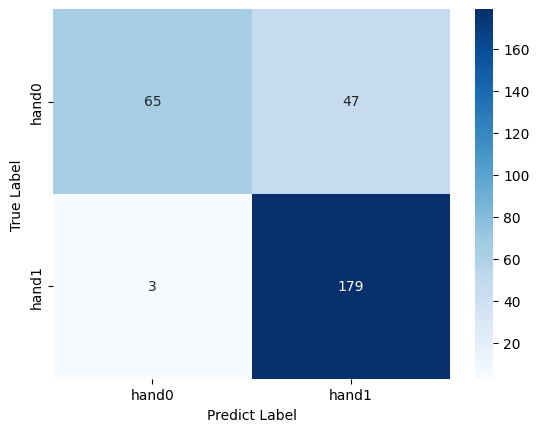

In [301]:
print("Accuracy on train:  ",lrc.score(X_train[selected_features],y_train),'\n')
print("Accuracy on test: ",lrc.score(X_test[selected_features],y_test),'\n')

print("Classification Report (Testing Data): \n", metrics.classification_report(y_test,y_pred_test,target_names=['hand0', 'hand1']),'\n')
cf=metrics.confusion_matrix(y_test,y_pred_test)
sns.heatmap(cf, annot=True, fmt="d", cmap="Blues", xticklabels=['hand0', 'hand1'], yticklabels=['hand0', 'hand1'])
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

Classification Report (Traing data): 
               precision    recall  f1-score   support

       hand0       0.94      0.74      0.83       260
       hand1       0.86      0.97      0.91       426

    accuracy                           0.88       686
   macro avg       0.90      0.86      0.87       686
weighted avg       0.89      0.88      0.88       686
 



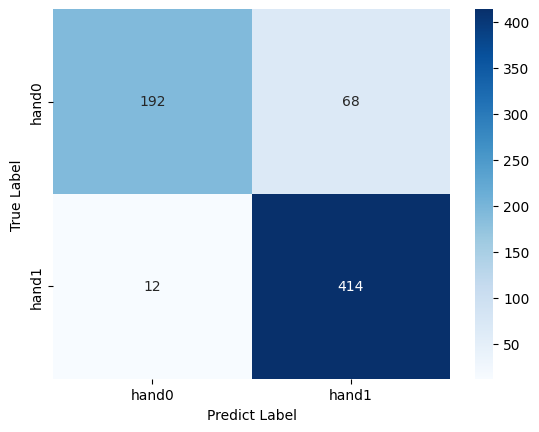

In [302]:
print("Classification Report (Traing data): \n", metrics.classification_report(y_train,y_pred_train,target_names=['hand0', 'hand1']),'\n')
cf=metrics.confusion_matrix(y_train,y_pred_train)
sns.heatmap(cf, annot=True, fmt="d", cmap="Blues", xticklabels=['hand0', 'hand1'], yticklabels=['hand0', 'hand1'])
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

In [303]:
# import joblib
# joblib_save_path = 'keypoint_upper/keypoint_classifier_lrc_upper_right_pipeline.pkl'
# joblib.dump(lrc, joblib_save_path)  # Save model

### Export the whole pipeline

In [304]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# Custom transformer to select features based on a mask
class MaskFeatureSelector:
    def __init__(self):
        # Predefined mask for 42 landmarks
        self.mask = [False, False, True, True, False, False, False, False, False, False,
                     True, True, False, False, False, False, True, True, True, True, False, False,
                     False, False, True, True, True, True, False, False, False, False, False, False,
                     True, True, True, True, True, True, True, True]

    def fit(self, X, y=None):
        return self  # No fitting needed

    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            # If X is a dataframe
            return X.iloc[:, self.mask]
        else:
            # If X is a numpy array
            return X[:, self.mask]

# Create a pipeline
pipeline = Pipeline([
    ('mask_feature_selection', MaskFeatureSelector()),  # No mask parameter needed
    ('scaler', MinMaxScaler()),  # Normalize features
    ('classifier', LogisticRegression(multi_class='ovr', solver='saga', random_state=10))  # Logistic Regression Model
])


In [305]:
# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('mask_feature_selection',
                 <__main__.MaskFeatureSelector object at 0x164d3c810>),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 LogisticRegression(multi_class='ovr', random_state=10,
                                    solver='saga'))])

Classification Report: 
               precision    recall  f1-score   support

       hand0       0.96      0.58      0.72       112
       hand1       0.79      0.98      0.88       182

    accuracy                           0.83       294
   macro avg       0.87      0.78      0.80       294
weighted avg       0.85      0.83      0.82       294
 

Accuracy on train:   0.8833819241982507 

Accuracy on test:  0.8299319727891157 



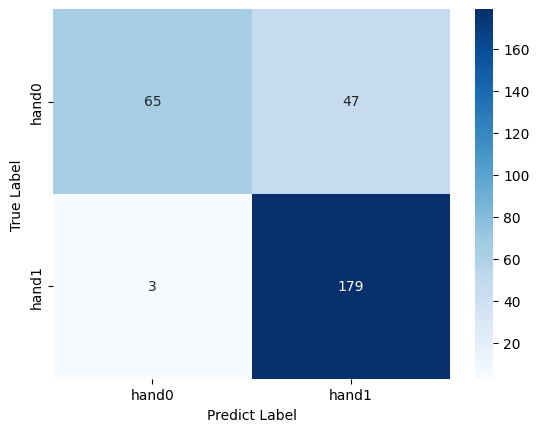

In [306]:
# Get predictions using the pipeline
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Print classification report
print("Classification Report: \n", metrics.classification_report(y_test, y_pred_test, target_names=['hand0', 'hand1']), '\n')

# Print accuracy scores
print("Accuracy on train:  ", pipeline.score(X_train, y_train), '\n')
print("Accuracy on test: ", pipeline.score(X_test, y_test), '\n')

# Compute and visualize confusion matrix
cf = metrics.confusion_matrix(y_test, y_pred_test)
sns.heatmap(cf, annot=True, fmt="d", cmap="Blues", xticklabels=['hand0', 'hand1'], yticklabels=['hand0', 'hand1'])
plt.ylabel("True Label")
plt.xlabel("Predict Label")

plt.savefig(f'{save_folder}fig/lrc_matrix_tesing_pipeline.jpg', format='jpg', dpi=300)
plt.show()


example real pre processed hand landmark

In [307]:
import joblib
joblib_save_path = f'{save_folder}pkl/lrc_upper_right_pipeline.pkl'
joblib.dump(pipeline, joblib_save_path)  # Save model

['keypoint_upper/training_0412_1736/pkl/lrc_upper_right_pipeline.pkl']

### Visualizing eq

Logistic Regression Equation:
log(p/(1-p)) = 0.7838 + (-1.2213 × feature_0) + (0.5322 × feature_1) + (-1.0122 × feature_2) + (1.1512 × feature_3) + (1.0133 × feature_4) + (-1.8786 × feature_5) + (-0.7112 × feature_6) + (0.1210 × feature_7) + (1.4861 × feature_8) + (-1.8313 × feature_9) + (-0.3011 × feature_10) + (-1.1880 × feature_11) + (-0.1446 × feature_12) + (-3.1547 × feature_13) + (2.0313 × feature_14) + (-2.2698 × feature_15) + (0.1905 × feature_16) + (1.9703 × feature_17) + (-2.4290 × feature_18) + (6.5261 × feature_19)

Feature Importance:
       Feature  Coefficient  Abs_Coefficient
7    feature_7     0.120971         0.120971
12  feature_12    -0.144643         0.144643
16  feature_16     0.190531         0.190531
10  feature_10    -0.301141         0.301141
1    feature_1     0.532244         0.532244
6    feature_6    -0.711246         0.711246
2    feature_2    -1.012171         1.012171
4    feature_4     1.013328         1.013328
3    feature_3     1.151227         1.151

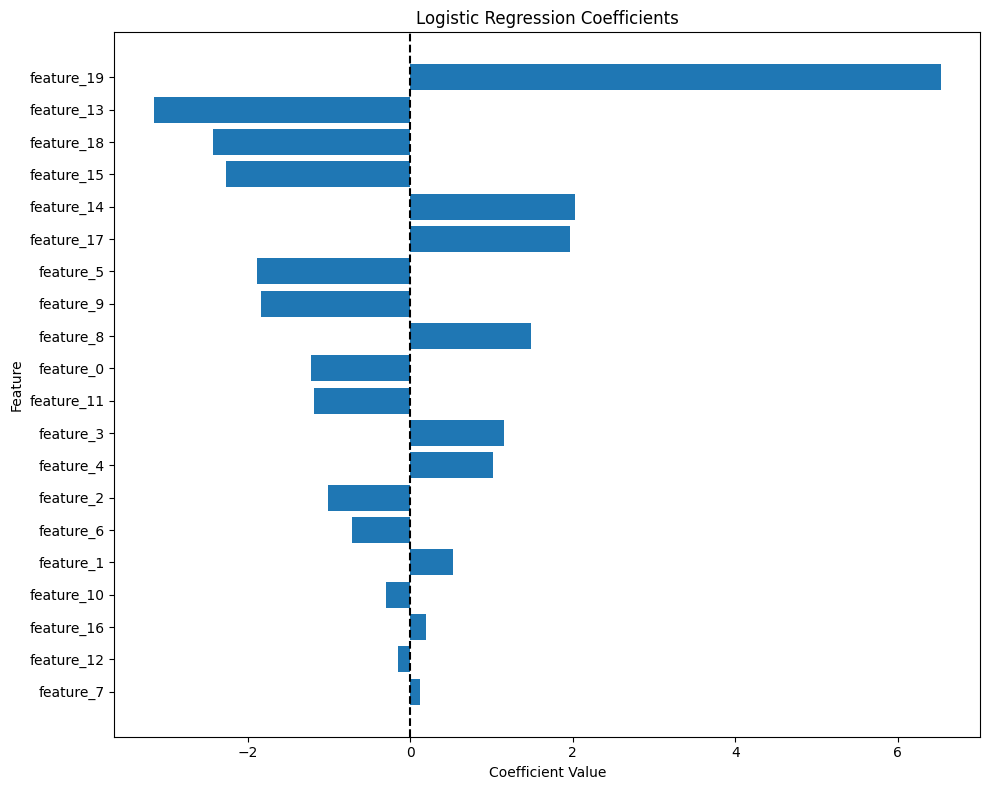

In [308]:
# Extract the logistic regression model from the pipeline
# Assuming it's the last step in the pipeline
logistic_model = pipeline.named_steps['classifier']  # Use your actual step name here

# Get coefficients and intercept
coefficients = logistic_model.coef_[0]  # For binary classification
intercept = logistic_model.intercept_[0]

# Get feature names (if available in the pipeline)
try:
    feature_names = pipeline.named_steps['mask_feature_selection'].get_feature_names_out()
except:
    # If your pipeline doesn't have a column transformer or different structure
    feature_names = [f'feature_{i}' for i in range(len(coefficients))]

# Print the equation
print("Logistic Regression Equation:")
equation = f"log(p/(1-p)) = {intercept:.4f}"
for coef, feature in zip(coefficients, feature_names):
    equation += f" + ({coef:.4f} × {feature})"
print(equation)

# Create a summary DataFrame with feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

# Sort by absolute importance
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=True)
print("\nFeature Importance:")
print(feature_importance)

# Visualize the coefficients
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'].values, feature_importance['Coefficient'].values)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.axvline(x=0, color='k', linestyle='--')
plt.tight_layout()

plt.savefig(f'{save_folder}fig/lrc_coefficients.jpg', format='jpg', dpi=300)

plt.show()

# KNN

In [322]:
#hyperparameter tuning using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#we'll create a dictionary with possible hyperparameter values
param_val = [{'n_neighbors' : range(3,10),'metric' : ['euclidean', 'minkowski', 'canberra']}]
#grid search configuration
knn = GridSearchCV(KNeighborsClassifier(), param_val, cv = 5,scoring='roc_auc_ovr')
#fitting into our data
knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['euclidean', 'minkowski', 'canberra'],
                          'n_neighbors': range(3, 10)}],
             scoring='roc_auc_ovr')

In [323]:
print(knn.best_score_)
print(knn.best_params_)

0.9882958013258971
{'metric': 'euclidean', 'n_neighbors': 3}


In [324]:
y_pred_test = knn.predict(X_test)

In [325]:
pred_prob_new=pd.DataFrame(knn.predict_proba(X_test))
metrics.accuracy_score(y_test,y_pred_test)

0.9625850340136054

Classification Report: 
               precision    recall  f1-score   support

       hand0       0.94      0.96      0.95       112
       hand1       0.98      0.96      0.97       182

    accuracy                           0.96       294
   macro avg       0.96      0.96      0.96       294
weighted avg       0.96      0.96      0.96       294
 

Accuracy on train:   0.99976977248104 

Accuracy on test:  0.9891581632653061 



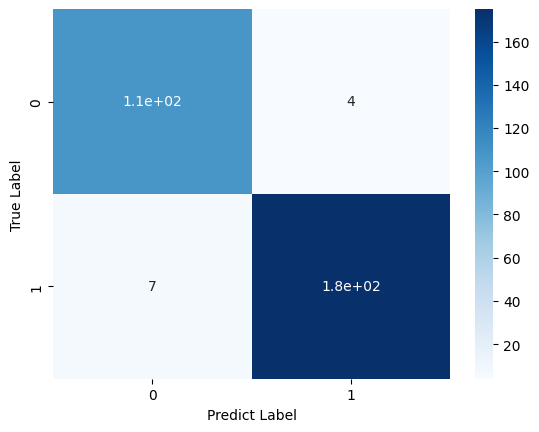

In [326]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Classification Report: \n", metrics.classification_report(y_test,y_pred_test,target_names=['hand0','hand1']),'\n')
print("Accuracy on train:  ",knn.score(X_train,y_train),'\n')
print("Accuracy on test: ",knn.score(X_test,y_test),'\n')
cf=metrics.confusion_matrix(y_test,y_pred_test)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()